In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [46]:
data = pd.read_csv('Preparados.csv')

 Fue definido como caso aquel paciente que fue sometido a biopsia prostática y que en un periodo máximo de 30 días posteriores al procedimiento presentó fiebre, infección urinaria o sepsis; requiriendo manejo médico ambulatorio u hospitalizado para la resolución de la complicación y como control al paciente que fue sometido a biopsia prostática y que no presentó complicaciones infecciosas en el período de 30 días posteriores al procedimiento.

In [47]:
data.drop(columns=['DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC','PSA','FIEBRE'],inplace=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 34 columns):
 #   Column                                                                                                 Non-Null Count  Dtype
---  ------                                                                                                 --------------  -----
 0   EDAD                                                                                                   562 non-null    int64
 1   DIABETES                                                                                               562 non-null    int64
 2   VOLUMEN PROSTATICO                                                                                     562 non-null    int64
 3   CUP                                                                                                    562 non-null    int64
 4   ENF. CRONICA PULMONAR OBSTRUCTIVA                                                                      562 non

In [49]:
y = data["HOSPITALIZACION"] # declaramos la columna etiqueta

# Elimina la columna del DataFrame original

data.drop(columns=["HOSPITALIZACION"], inplace=True)

# asignamos a X los valores restantes para entrenar

X = data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


In [51]:
clf = DecisionTreeClassifier(max_depth = 4, random_state = 42)
# clf = RandomForestClassifier(n_estimators=100, random_state=42, min_depth =)

In [52]:
tree = clf.fit(X_train,y_train)

tree

RandomForestClassifier(random_state=42)

In [60]:
evaluacion = tree.predict(X_test)

score = accuracy_score(evaluacion,y_test)

score

C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.9763313609467456

In [59]:
from sklearn.metrics import  classification_report
print(classification_report(evaluacion, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       164
           1       0.56      1.00      0.71         5

    accuracy                           0.98       169
   macro avg       0.78      0.99      0.85       169
weighted avg       0.99      0.98      0.98       169



In [54]:
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura según tus preferencias
from sklearn.tree import plot_tree
plot_tree(clf, filled=True, feature_names=None, class_names=['si','no'])  # Puedes proporcionar nombres de características y clases si es necesario
plt.show()

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got RandomForestClassifier(random_state=42) instead.

<Figure size 1500x1000 with 0 Axes>

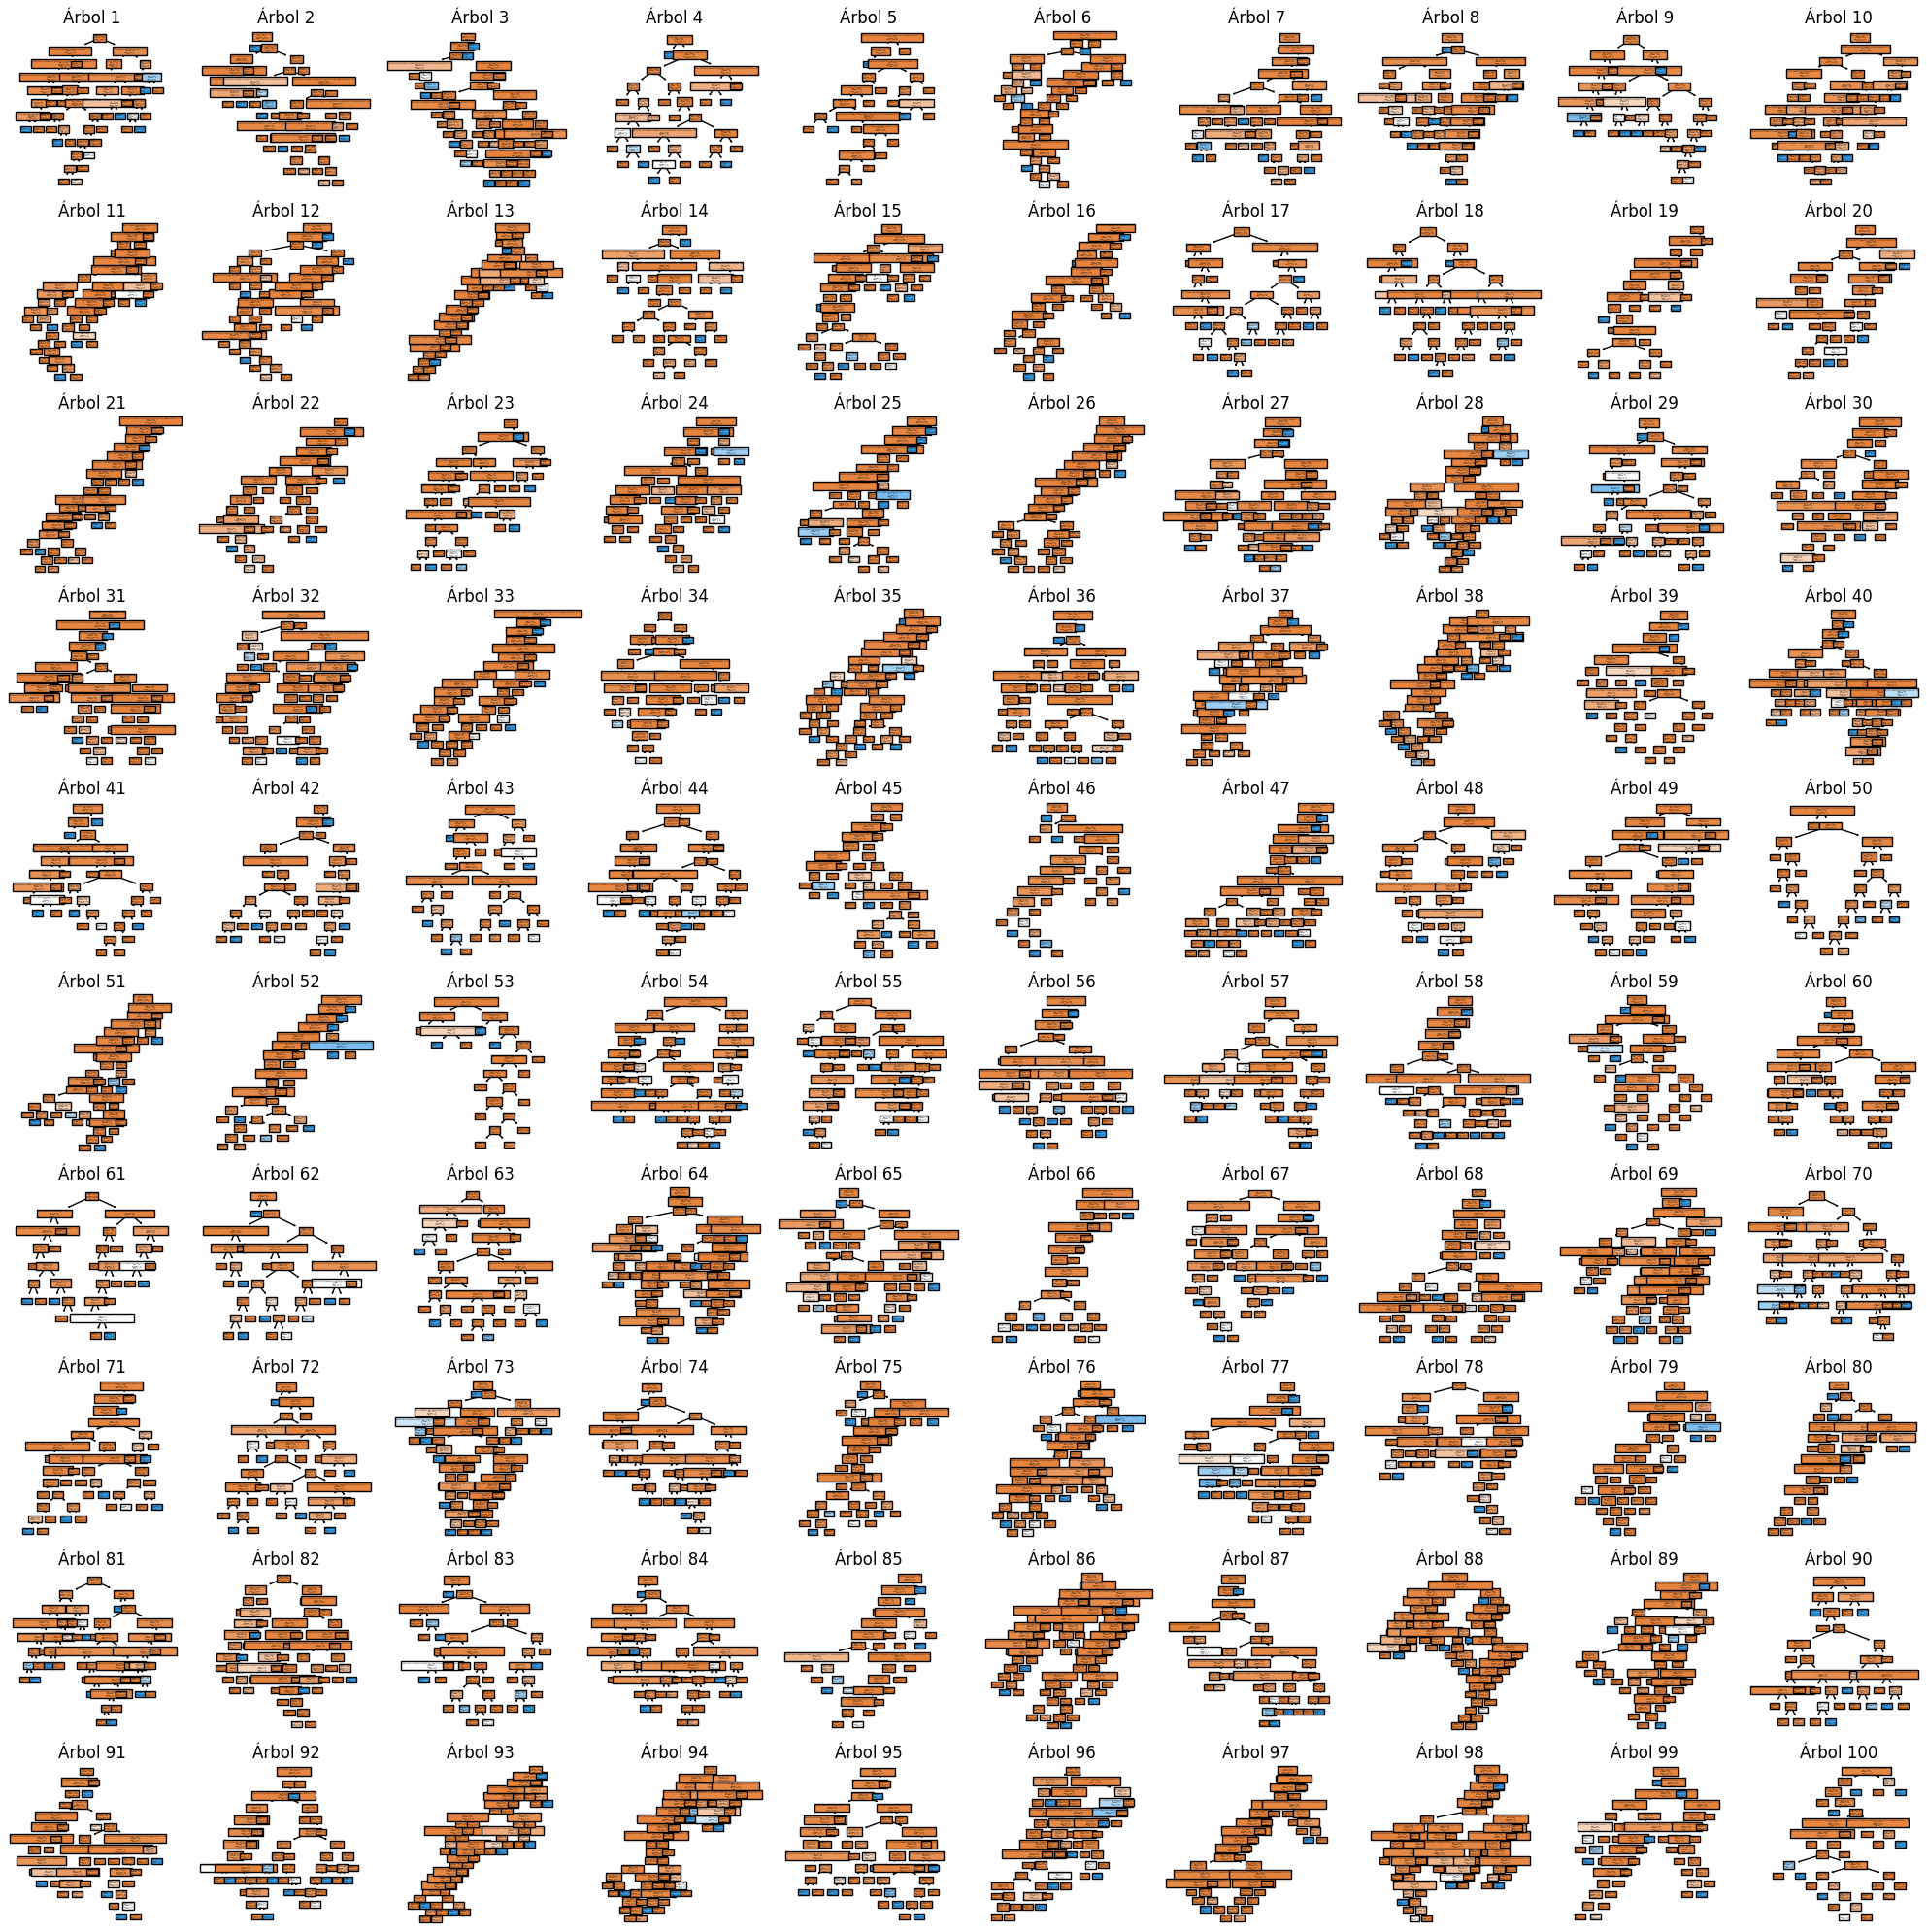

In [58]:
# Crear una figura con el tamaño deseado
plt.figure(figsize=(20, 20))

# Iterar a través de los árboles y visualizarlos
for i, tree in enumerate(clf.estimators_):
    plt.subplot(10, 10, i + 1)
    plot_tree(tree, filled=True, feature_names=X.columns, class_names=[str(x) for x in y.unique()])
    plt.title(f'Árbol {i+1}')

plt.tight_layout()
plt.show()

In [41]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [42]:
grid_search = GridSearchCV(tree,param_grid, cv=6, scoring='accuracy')

In [43]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=6,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [44]:
mejor_parametro = grid_search.best_estimator_
print(mejor_parametro)

DecisionTreeClassifier(max_depth=4, random_state=42)
